# Proteomics Website Data Collection

##### **Technical goal**:  Generate json data files that will be used to make a javascript generated table and bar plot
##### **Purpose**:  Client would like to better communicate the data that their organization has generated and the importance of this data to the greater research community
##### **Deliverables**:  
  1.  table generated from json file
  2.  bar chart generated from json file indicationg the publication importance of the research  
  
##### **Advantages of this method**:  This script can be run to update the datafile and the new file can replace the previous version to get instant updates with minimal effort
##### **Website url**:  http://nrtdp.northwestern.edu/targets/ 

In [1]:
# Import webscraping packages
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
from bs4 import BeautifulSoup as soup

# Import time and data packages
import time
import json
import pandas as pd

# Import jupyter python image display package
from IPython.display import Image

### Generate dataset for javascript-based table

In [2]:
# read table of existing targets
# note:  to open an xlsx, specify the engine as 'openpyxl'
target_df = pd.read_excel('targets.xlsx', engine='openpyxl')

In [3]:
# Show results
target_df.head()

,Target,Search Version,UniProt ID,Uniprot Link,Uniprot href,Gene Name,Compartment
0,p21 (Cip1/Waf1),p21+Cip1+Waf1,P38936,https://www.uniprot.org/uniprot/P38936,"<a href=""https://www.uniprot.org/uniprot/P3893...",CDKN1A,nucleus
1,p16 (CDKN2A/p16INK4a),p16+CDKN2A+p16INK4a,P42771,https://www.uniprot.org/uniprot/P42771,"<a href=""https://www.uniprot.org/uniprot/P4277...",CDKN2A,nucleus
2,p53,p53,P04637,https://www.uniprot.org/uniprot/P04637,"<a href=""https://www.uniprot.org/uniprot/P0463...",TP53,many
3,DAP-1,DAP-1,P51397,https://www.uniprot.org/uniprot/P51397,"<a href=""https://www.uniprot.org/uniprot/P5139...",DAP,cytosol
4,Platelet Factor 4,Platelet+Factor+4,P02776,https://www.uniprot.org/uniprot/P02776,"<a href=""https://www.uniprot.org/uniprot/P0277...",PF4,secreted


In [4]:
# collect only pertinent columns
table_data_df = target_df[['Target', 'Gene Name', 'Uniprot href', 'Compartment']]
table_data_df

,Target,Gene Name,Uniprot href,Compartment
0,p21 (Cip1/Waf1),CDKN1A,"<a href=""https://www.uniprot.org/uniprot/P3893...",nucleus
1,p16 (CDKN2A/p16INK4a),CDKN2A,"<a href=""https://www.uniprot.org/uniprot/P4277...",nucleus
2,p53,TP53,"<a href=""https://www.uniprot.org/uniprot/P0463...",many
3,DAP-1,DAP,"<a href=""https://www.uniprot.org/uniprot/P5139...",cytosol
4,Platelet Factor 4,PF4,"<a href=""https://www.uniprot.org/uniprot/P0277...",secreted
5,Thymosin Beta 4,TMSB4X,"<a href=""https://www.uniprot.org/uniprot/P6232...",cytoskeleton/secreted
6,C-C Motif Chemokine 5,CCL5,"<a href=""https://www.uniprot.org/uniprot/P1350...",secreted
7,B-RAF,BRAF,"<a href=""https://www.uniprot.org/uniprot/P1505...",cytosol/membrane Assoc
8,C-RAF,RAF1,"<a href=""https://www.uniprot.org/uniprot/P0404...",cytosol/membrane Assoc
9,MEK1,MAP2K1,"<a href=""https://www.uniprot.org/uniprot/Q0275...",cytosol


In [5]:
# save content as a json file
# this file will be used to make a searchable, sortable table
result = table_data_df.to_json('../static/data/table_data.json', orient="records")
print(result)

None


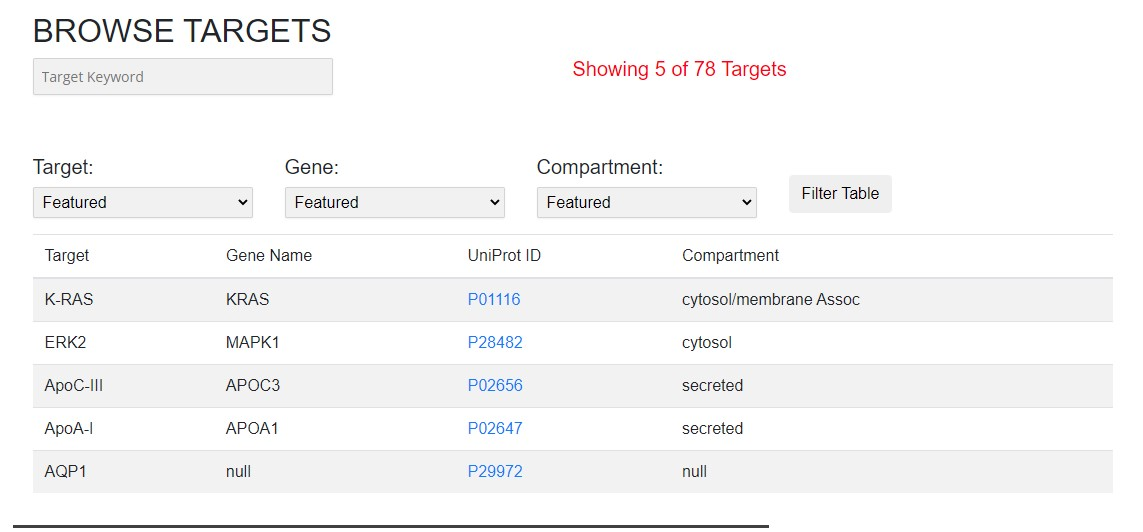

In [6]:
# Here is an example of how the data is used
PATH = "./images/js-table.jpg"
Image(filename = PATH, width=900, height=600)

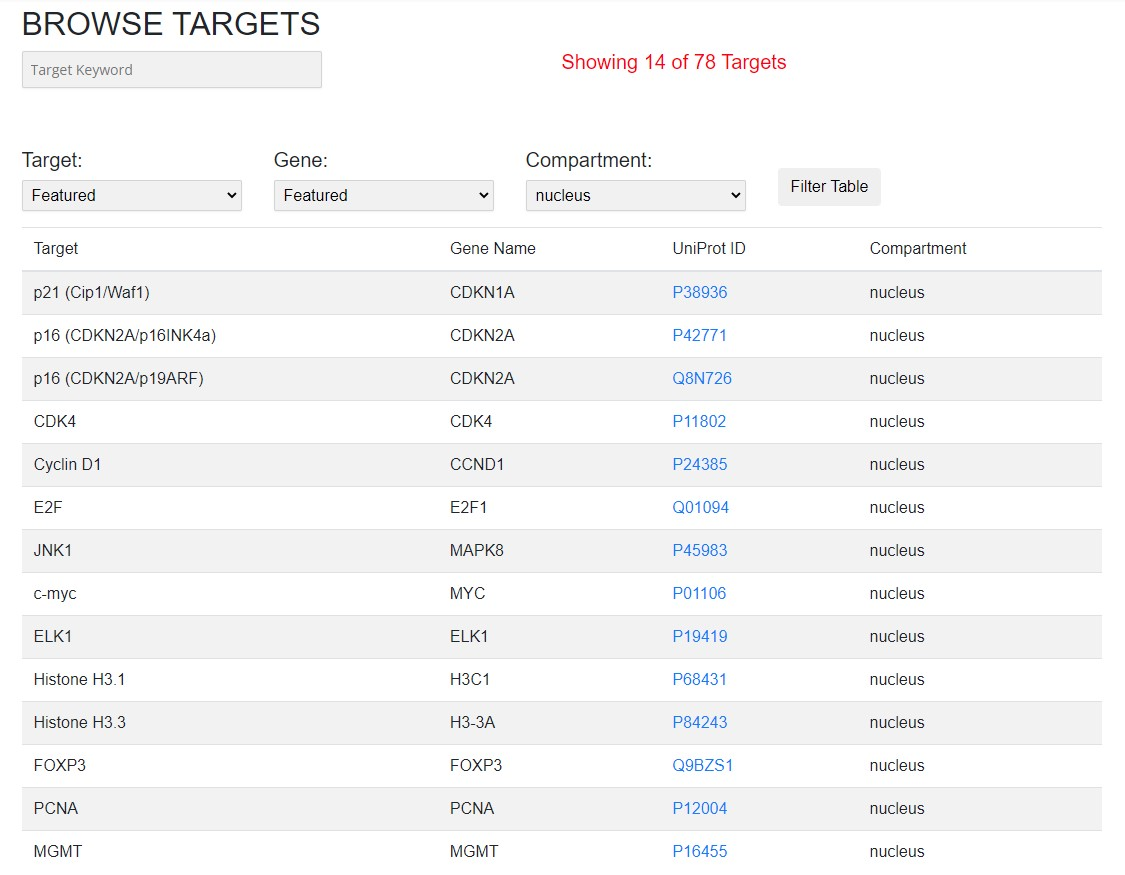

In [7]:
# Here is the table filtered by Compartment: nucleus
# The UniProt ID is a hyperlink to https://www.uniprot.org/uniprot/ 

PATH = "./images/js-table-filtered.jpg"
Image(filename = PATH, width=900, height=600)

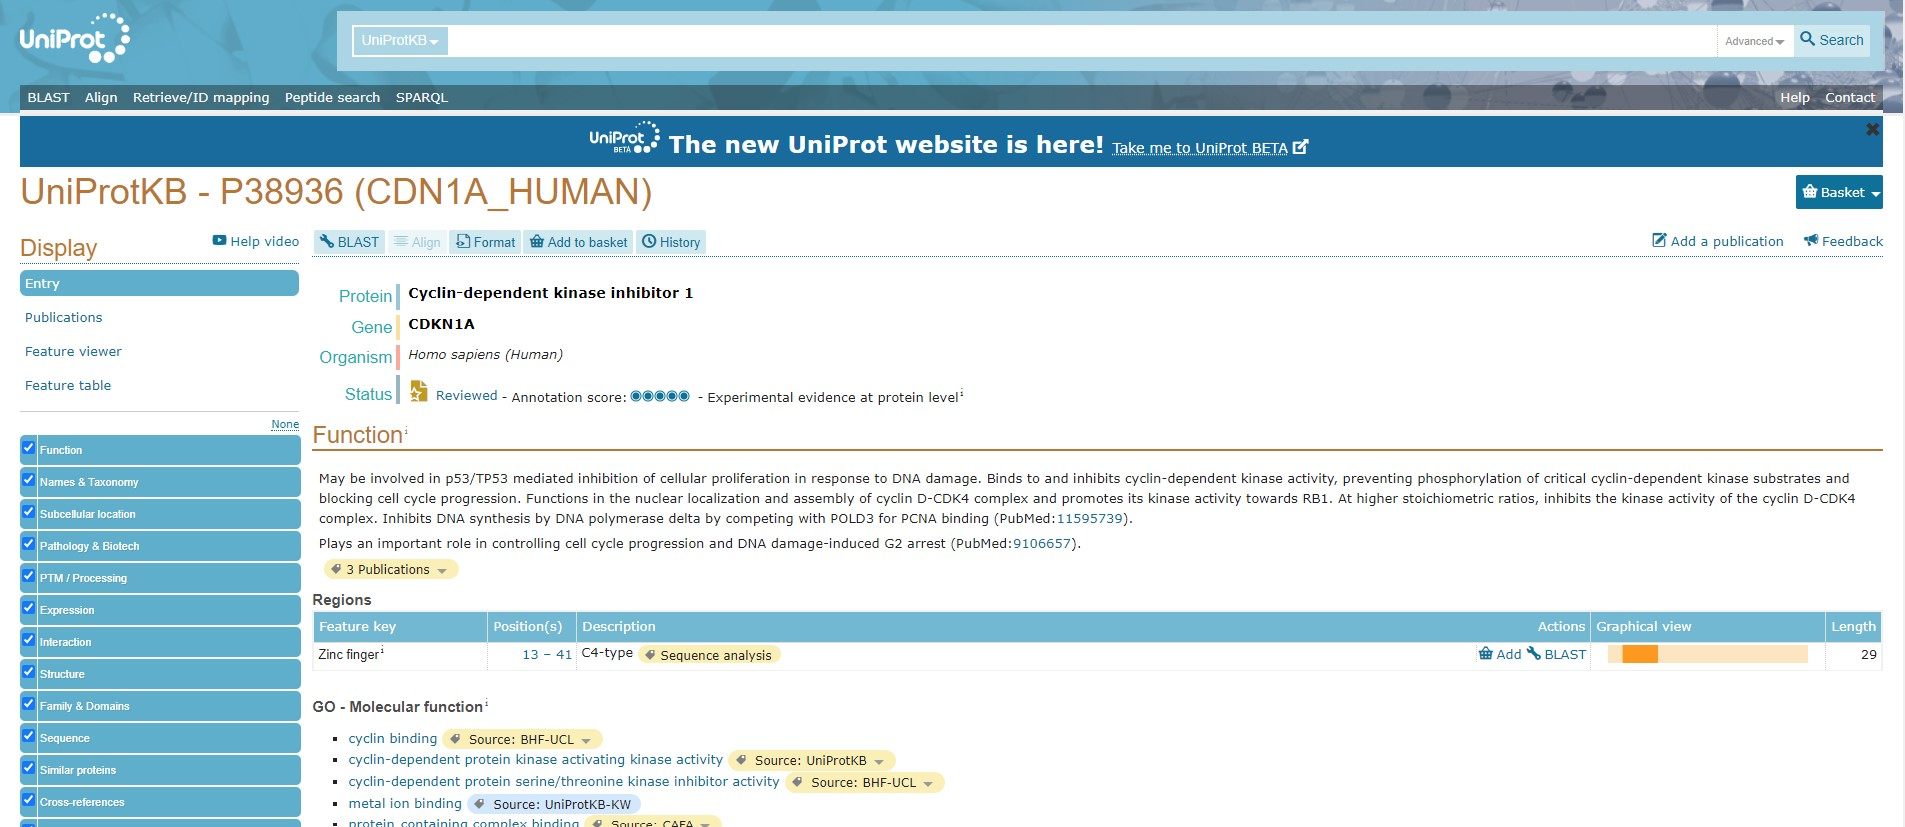

In [8]:
# Uniprot Website of a specific protein (P38936)

PATH = "./images/uniprotkb.jpg"
Image(filename = PATH, width=900, height=600)

### Generate dataset for Plotly bar charts 

In [9]:
# PubMed Webscrape
# URL format:  https://pubmed.ncbi.nlm.nih.gov/?term=p21

In [10]:
# Get string in a format that is complient with the search page
targets = list(target_df['Search Version'])

# Get string in a format that is easy to read
target_names = list(target_df['Target'])

In [11]:
# view output for formatting
targets[0:3]

['p21+Cip1+Waf1', 'p16+CDKN2A+p16INK4a', 'p53']

In [12]:
# select a subset of data for testing scraping
new = ['p21+Cip1+Waf1', 'p16+CDKN2A+p16INK4a', 'p16+CDKN2A+p19ARF']

In [13]:
# Set up Splinter using ChromeDriver Manager
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 103.0.5060
Get LATEST chromedriver version for 103.0.5060 google-chrome
Driver [C:\Users\ejwda\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [14]:
# create dictionary and list used to form the json structure
target_dict = {}
publication_list=[]

# json structure:
# 1.  Key for a list of formatted names plus one called featured targets (ie name:["..", "..", ...])
# 2.  Key for the number of of publications in the featured targets (ie total_pubs: [#,#,#, ...])
# 3.  Key for a list of dictionaries for each protein that includes protein name, total publications, list of years, and list of publications per year
#     (ie 'publications':[  {"id": <targetname>,"total_publications": <number>, "years":[<years>,...], "num_publications":[#,#,...]} ]    )

# Here is an abbreviated example:
# {
# 'names':[names, ],
# 'publications':[
#                   {'targets':['feature_list'], 'total_pubs':['publication_list']}, 
#                   {'publications':[  
#                                     {"id": <targetname>,"total_publications": <number>, "years":[<year1>,<year2>,...], "num_publications":[#,#,...]  },
#                                     {"id": <targetname>,"total_publications": <number>, "years":[<year1>,<year2>,...], "num_publications":[#,#,...]  },
#                                     {...}
#                                   ]
#                   }
#                 ]
# }

In [15]:
# Create list item called "Featured Targets" - this list item will have a purpose in the plotly
target_names.insert(0, 'Featured Targets')

# Create key called name that includes all the target names and featured targets
target_dict['name'] = target_names

# Create key for featured targets and associted total publications
feature = {'targets': ['K-RAS', 'ERK2', 'ApoA-I', 'ApoC-III', 'AQP1'], 'total_pubs':[6430, 4567, 12920, 2276, 2268]}
publication_list.append(feature)

In [16]:
# This step can take several minutes
# To track progress a print statement was added to show the last record completed and its status (succeeded or failed)

# number of targets for progress tracking
number_targets = len(targets)

# iterate through searchable target names
for target in targets:
    
    # potential null responses for searches so add error logic
    try:
        # visit the PubMed site and search for target
        url = f'https://pubmed.ncbi.nlm.nih.gov/?term={target}'
        browser.visit(url)

        # optional delay for loading the page
        time.sleep(1)

        # search for page part
        browser.is_element_present_by_css('main.search-page', wait_time=1)

        # convert the browser html to a soup object
        html = browser.html
        pubmed_soup = soup(html, 'html.parser')

        # find div holding the number of search results found (dsiplayed above search results)
        pubs_elem = pubmed_soup.find('div', class_='results-amount')
        # extract the number of results from the div
        total_pubs = pubs_elem.find('span', class_='value').get_text()

        # only one table exists on the page and it makes a bar chart
        # use pandas to extract out the table data
        dfs = pd.read_html(url)
        # extract out the years from the table
        years = list(dfs[0]['Year'])
        # extract out the number of publications per year (matches the number of list items as 'years')
        num_publications = list(dfs[0]['Number of Results'])

        # create a dictionary to hold each protein search results
        pub_dict = {}
        
        # create id that matches the name from the target list        
        pub_dict['id'] = target_names[targets.index(target)+1]
        # record total publicatins over all years
        pub_dict['total_publications'] = total_pubs
        # record list of years when publications occurred 
        pub_dict['years'] = years
        # record list of number of publications for each year
        pub_dict['num_publications'] = num_publications
        
        # add searched protein results as dictionary to the publication list
        publication_list.append(pub_dict)

        time.sleep(1)
        print( f"Record {targets.index(target)+1} of {number_targets}:  {target} Search Succeeded" )
    
    # in the case of no search results and an error occurs
    except:
        
        # create a dictionary to hold each protein search results
        pub_dict = {}
        
        # add default values for search results that are missing 
        pub_dict['id'] = target_names[targets.index(target)+1]
        pub_dict['total_publications'] = 0
        pub_dict['years'] = 2021
        pub_dict['num_publications'] = 0
        
        # add missing record to dictionary; needed to keep name list indexes and dictionary list indexes matching
        publication_list.append(pub_dict)
        
        print( f"Record {targets.index(target)+1} of {number_targets}:  {target} Search Failed" )
        
# add protein target result list to dictionary as 'publications'
target_dict['publications'] = publication_list

Record 1 of 13:  p21+Cip1+Waf1 Search Succeeded
Record 2 of 13:  p16+CDKN2A+p16INK4a Search Succeeded
Record 3 of 13:  p53 Search Succeeded
Record 4 of 13:  DAP-1 Search Succeeded
Record 5 of 13:  Platelet+Factor+4 Search Succeeded
Record 6 of 13:  Thymosin+Beta+4 Search Succeeded
Record 7 of 13:  C-C+Motif+Chemokine+5 Search Succeeded
Record 8 of 13:  B-RAF Search Succeeded
Record 9 of 13:  C-RAF Search Succeeded
Record 10 of 13:  MEK1 Search Succeeded
Record 11 of 13:  CD20 Search Succeeded
Record 12 of 13:  IL-2 Search Succeeded
Record 13 of 13:  CD8 Search Succeeded


In [17]:
# json_object = json.dumps(target_dict, indent = 4)  
# print(json_object) 

with open("../static/data/pub.json", "w") as outfile: 
    json.dump(target_dict, outfile)


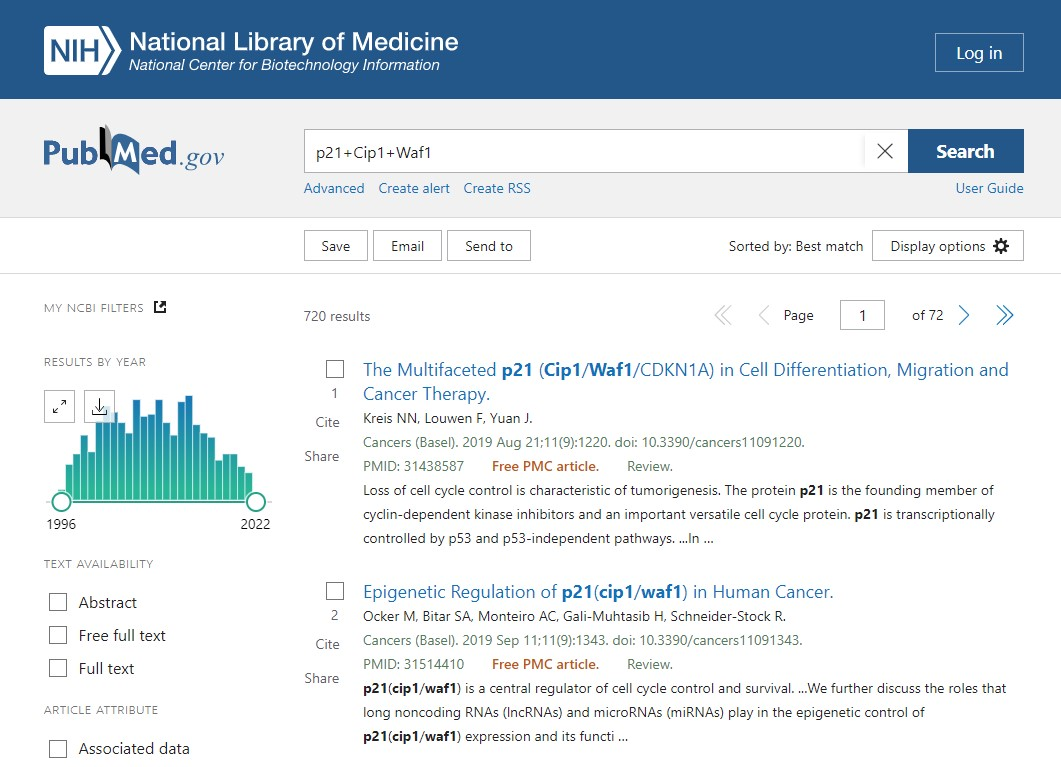

In [18]:
# PubMed Website of a specific protein (P21 Cip1 Waf1)

PATH = "./images/pubmed_protein_search.jpg"
Image(filename = PATH, width=900, height=600)

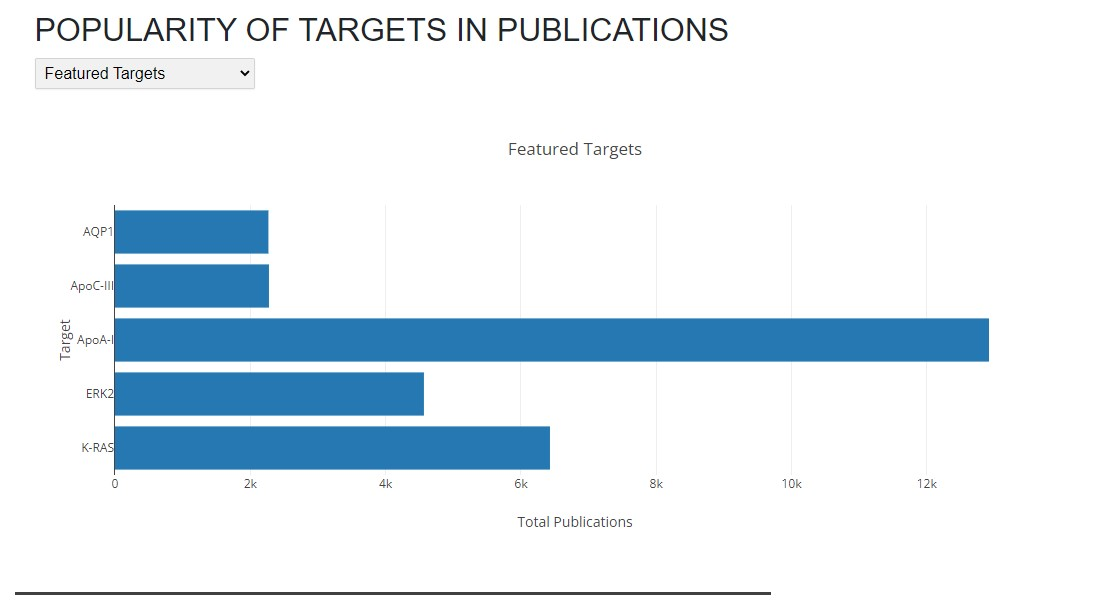

In [19]:
# Data is used to created this barchart
# Note:  Default view is set to Featured Targets and this option shows a horizontal bar chart of 5 featured proteins of the total of all historical publications (all years)

PATH = "./images/js-plotly-menu-closed.jpg"
Image(filename = PATH, width=900, height=600)

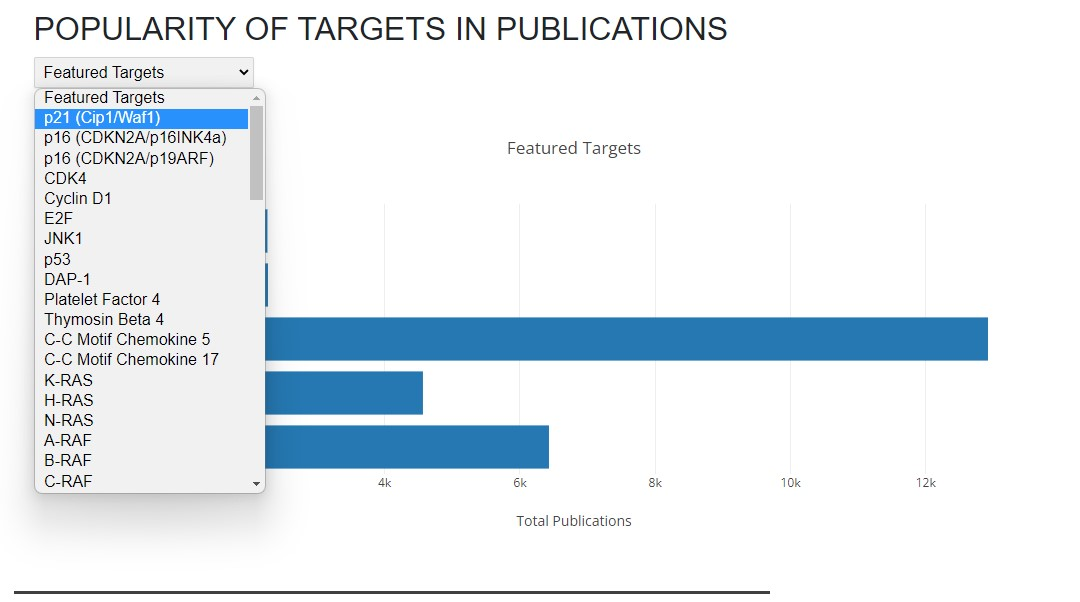

In [20]:
# Note:   The menu shows all the items from the names dictionary key.

PATH = "./images/js-plotly-menu-open.jpg"
Image(filename = PATH, width=900, height=600)

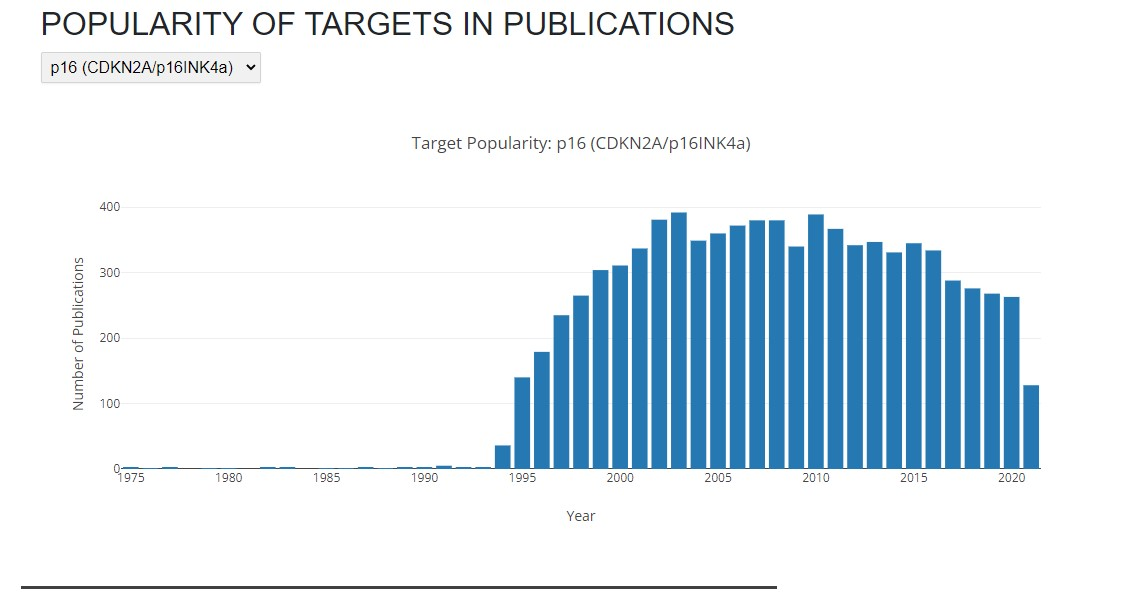

In [21]:
# Note:   When a specific target is selected the bar chart orientation changes to vertical and the bar chart shows publications per year

PATH = "./images/js-plotly-target-selected.jpg"
Image(filename = PATH, width=900, height=600)